In [1]:
!pip install gymnasium matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827620 sha256=8349e6d5e99f31b57587964f661d5878b8bc2a3039b569aa21077904a0965fd8
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import pygame
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/RL1/images

Mounted at /content/drive
/
/content/drive/MyDrive/RL1/images


#**Deterministic Environment**

#Welcome aboard! For my environment I've presented a very famous PS4-PS5 game scenario, i.e. God of War 4 and Ragnarök (A game based on the intersection of greek and norse mythology).

###Basically Kratos (our agent) is the God of War in Greek mythology, Odin is the king of all gods in norse mythology along with his sons; thor, baldur who are the gods in norse mythology. They seek out to prevent kratos to seek out his son atrues so the gods in norse mythology are the enemies of kratos and atrues.

######In this environment we have our own mighty sparta **"AGENT"** name **Kratos** who always looks out for his son **Atrues** which happens to be our **"TARGET"**, followed by the **"REWARD"** which is **mead** (alcohol that was widely consumed back in greece and norse mythology)

In [4]:
class GodOfWar(gym.Env):

  metadata = {'render.modes': []}

  def __init__(self):
    self.environment_width = 4
    self.environment_height = 4
    self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 20

  def reset(self):

    self.kratos_pos = np.asarray([0, 0]) #Agent initial position
    self.atrues_pos = np.asarray([3,2]) #Target position
    self.odin_pos = np.asarray([0,2]) #Obstacle1 position
    self.thor_pos = np.asarray([2,0]) #Obstacle2 position
    self.baldur_pos = np.asarray([1,3]) #Obstacle3 position
    self.mead_pos = np.asarray([[3,3], [3,0], [1,1], [0,3]]) #Rewards position

    self.timestep = 0
    obs = self.kratos_pos
    return obs

  def step(self,action):

    if action == 0:
      self.kratos_pos[0] += 1  #This action causes the agent to go right.
    if action == 1:
      self.kratos_pos[0] -= 1  #This action causes the agent to go left.
    if action == 2:
      self.kratos_pos[1] += 1  #This action causes the agent to go up.
    if action == 3:
      self.kratos_pos[1] -= 1. #This action causes the agent to go down.

    self.kratos_pos = np.clip(self.kratos_pos, 0, 3)
    obs = self.kratos_pos

    reward = 0

    #Reward for finding atrues
    if np.array_equal(self.kratos_pos, self.atrues_pos):
      reward = 100

    #Penalty for encountering Odin
    elif np.array_equal(self.kratos_pos, self.odin_pos):
        reward = -50

    #Penalty for encountering Thor
    elif np.array_equal(self.kratos_pos, self.thor_pos):
        reward = -30

    #Penalty for encountering Baldur
    elif np.array_equal(self.kratos_pos, self.baldur_pos):
        reward = -20

    #Reward for finding mead at different positions
    elif np.array_equal(self.kratos_pos, self.mead_pos[0]): # Mead at (3,3)
        reward = 10
    elif np.array_equal(self.kratos_pos, self.mead_pos[1]): # Mead at (0,3)
        reward = 6
    elif np.array_equal(self.kratos_pos, self.mead_pos[2]): # Mead at (2,1)
        reward = 3
    elif np.array_equal(self.kratos_pos, self.mead_pos[3]): # Mead at (0,3)
        reward = 1


    self.timestep +=1

    goal_reached = np.array_equal(self.kratos_pos, self.atrues_pos)

    # Check if the maximum number of timesteps has been reached
    time_limit_reached = self.timestep >= self.max_timesteps

    # Set the done flag based on whether any termination condition is met
    done = goal_reached or time_limit_reached

    self.termination = "Boy! I'm here" if goal_reached else "Do Not Mistake My Silence For Lack Of Grief."

    info = {'Adventure_result': self.termination}

    return obs, reward, done, info

  def render(self, mode="human", plot=False):

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)

    #ax.set_facecolor('lightblue')
    background_image = plt.imread('background.png')  # Make sure to provide the correct path
    ax.imshow(background_image, extent=[0, 4, 0, 4], aspect='1')



    def plot_image(plot_pos):

        plot_kratos, plot_atrues, plot_mead, plot_baldur, plot_odin, plot_thor = False, False, False, False, False, False

        # Checking which objects need to be plotted by comparing their positions


    # Checking for kratos's (Agent) position
        if np.array_equal(self.kratos_pos, plot_pos):
          plot_kratos = True
    # Checking for Reward's position
        if any(np.array_equal(self.mead_pos[i], plot_pos) for i in range(len(self.mead_pos))):
          plot_mead = True

    # Checking for Atrues's (Target) position
        if np.array_equal(plot_pos, self.atrues_pos):
          plot_atrues = True

    # Checking for Baldur's position
        if np.array_equal(plot_pos, self.baldur_pos):
          plot_baldur = True

    # Checking for Odin's position
        if np.array_equal(plot_pos, self.odin_pos):
         plot_odin = True

    # Checking for Thor's position
        if np.array_equal(plot_pos, self.thor_pos):
          plot_thor = True

    # Plot for our Agent (Kratos):
        if plot_kratos and \
         all(not item for item in
             [plot_atrues, plot_mead, plot_baldur, plot_odin, plot_thor]):
          kratos = AnnotationBbox(OffsetImage(plt.imread('kratos.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos)

   # Plot for our Target (Atrues):

        if plot_atrues and \
         all(not item for item in
             [plot_kratos, plot_mead, plot_baldur, plot_odin, plot_thor]):
          atrues = AnnotationBbox(OffsetImage(plt.imread('atrues.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(atrues)

   # Plot for Baldur:
        if plot_baldur and \
         all(not item for item in [plot_kratos, plot_mead, plot_atrues, plot_odin, plot_thor]):
          baldur = AnnotationBbox(OffsetImage(plt.imread('baldur.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(baldur)

   # Plot for Odin:
        if plot_odin and \
         all(not item for item in [plot_kratos, plot_mead, plot_baldur, plot_atrues, plot_thor]):
          odin = AnnotationBbox(OffsetImage(plt.imread('odin.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(odin)

   # Plot for Thor:
        if plot_thor and \
         all(not item for item in [plot_kratos, plot_mead, plot_baldur, plot_odin, plot_atrues]):
          thor = AnnotationBbox(OffsetImage(plt.imread('thor.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(thor)

   # Plot for mead (Reward):
        if plot_mead and \
         all(not item for item in [plot_kratos, plot_atrues, plot_baldur, plot_odin, plot_thor]):
          mead = AnnotationBbox(OffsetImage(plt.imread('mead.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(mead)

       #Plot for epic battle between kratos and thor:

        elif all(item for item in [plot_kratos, plot_thor]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_baldur, plot_odin]):
          kratos_thor = AnnotationBbox(OffsetImage(plt.imread('kratos_thor.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_thor)

         #plot for epic battle between kratos and baldur:

        elif all(item for item in [plot_kratos, plot_baldur]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_thor, plot_odin]):
          kratos_baldur = AnnotationBbox(OffsetImage(plt.imread('kratos_baldur.png'), zoom=0.28),
                                         np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_baldur)

         #plot for epic battle between kratos and odin:

        elif all(item for item in [plot_kratos, plot_odin]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_baldur, plot_thor]):
          kratos_odin = AnnotationBbox(OffsetImage(plt.imread('kratos_odin.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_odin)

         #plot for kratos enjoying mead and have surblast of energy (In Spartan's word:: Rage of Sparta!):

        elif all(item for item in [plot_kratos, plot_mead]) and \
         all(not item for item in [plot_atrues, plot_thor, plot_baldur, plot_odin]):
          kratos_mead = AnnotationBbox(OffsetImage(plt.imread('kratos_mead.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_mead)

         #plot for kratos re-grouping with atrues:

        elif all(item for item in [plot_kratos, plot_atrues]) and \
         all(not item for item in [plot_thor, plot_mead, plot_baldur, plot_odin]):
          kratos_atrues = AnnotationBbox(OffsetImage(plt.imread('kratos_atrues.png'), zoom=0.28),
                                         np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_atrues)


    coordinates_state_mapping_2 = {}
    for j in range(self.environment_height * self.environment_width):
      coordinates_state_mapping_2[j] = np.asarray(
          [j % self.environment_width, int(np.floor(j / self.environment_width))])

      # Rendering the images for all states.
    for position in coordinates_state_mapping_2:
      plot_image(coordinates_state_mapping_2[position])

    plt.xticks([0, 1, 2, 3])
    plt.yticks([0, 1, 2, 3])
    plt.grid()

    if plot:
      plt.show()
    else:  # Returning the preprocessed image representation of the environment.
          fig.canvas.draw()
          img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
          width = 84
          height = 84
          dim = (width, height)
          preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
          plt.show()
          return preprocessed_image


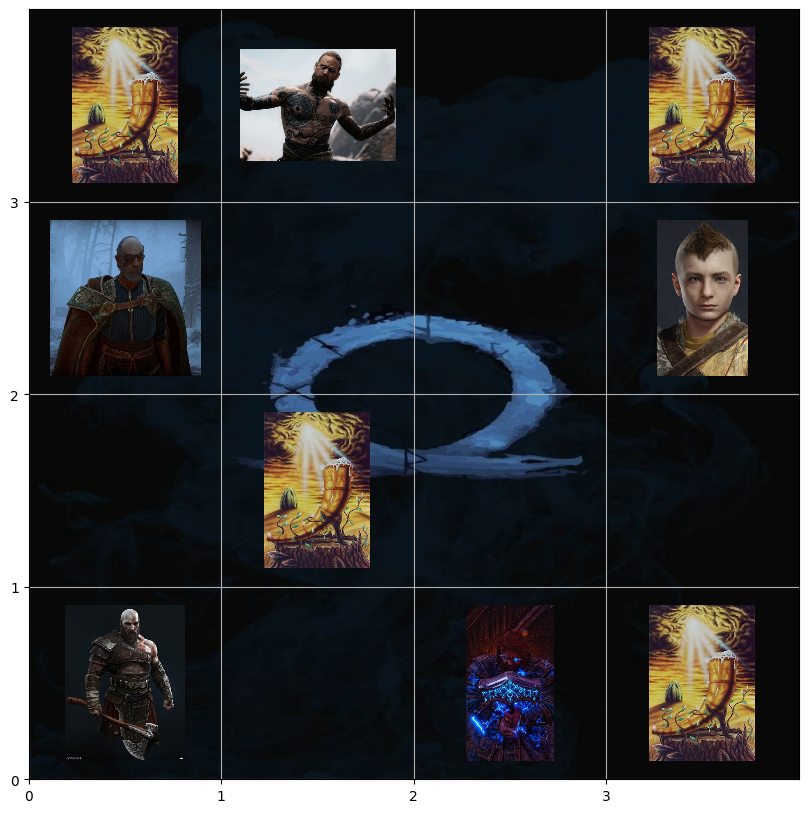

In [5]:
environment = GodOfWar()
environment.reset()
environment.render(plot=True)

#Stochastic Environment and Random Agent


In [8]:
def make_environment_stochastic(environment):
    original_step = environment.step

    def stochastic_step(action):
        # Introduce randomness:
        if np.random.rand() < 0.9:  #90% chance
            return original_step(action)
        else:  #10% chance to take a random action
            random_action = environment.action_space.sample()
            return original_step(random_action)

    environment.step = stochastic_step

#SARSA

In [17]:
def epsilon_greedy(q_table, state, e = 0.1):

  if np.random.rand() < e:
    return np.random.choice((q_table.shape[1])) #Random Action

  else:
    return np.argmax(q_table[state]) #Greedy Action

In [18]:
def SARSA_L(env, alpha, epsilon, epsilon_decay, gamma, num_episodes):
  environment_width = environment.environment_width
  environment_height = environment.environment_height
  num_states = environment_width * environment_height
  num_actions = environment.action_space.n
  q_table = np.zeros((num_states, num_actions))
  rewards_all_episodes = []
  epsilon_values = []
  min_epsilon = 0.01

  print("Initial Q-table:")
  print(q_table)

  for episode in range(num_episodes):
    state_2d = environment.reset()
    state = np.ravel_multi_index(state_2d, (environment_width, environment_height))

    total_rewards = 0

    action = epsilon_greedy(q_table, state, epsilon)

    done = False

    while not done:
      new_state_2d, reward, done, _ = environment.step(action)

      new_state = np.ravel_multi_index(new_state_2d, (environment_width, environment_height))

      new_action = epsilon_greedy(q_table, new_state, epsilon)

      q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * q_table[new_state, new_action] - q_table[state, action])


      action = new_action
      state = new_state_2d
      total_rewards += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_all_episodes.append(total_rewards)
    epsilon_values.append(epsilon)

    print(f"Episode: {episode}, Reward: {total_rewards}, Epsilon: {epsilon}")

  return q_table, rewards_all_episodes, epsilon_values



#SARSA for Deterministic environment

In [47]:
num_episodes = 1000
#max_steps_per_episode = 100
alpha = 0.15  #Learning rate
gamma = 0.988  #Discount factor
epsilon = 1.0
epsilon_decay = 0.9955
#min_epsilon = 0.01

#Training on the deterministic environment
deterministic_env = GodOfWar()

SARSA_D_q_table, rewards_all_episodes_SARSA, epsilon_values_SARSA = SARSA_L(deterministic_env, alpha, epsilon, epsilon_decay, gamma, num_episodes)



Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: -90, Epsilon: 0.9955
Episode: 1, Reward: -81, Epsilon: 0.9910202500000002
Episode: 2, Reward: -94, Epsilon: 0.9865606588750002
Episode: 3, Reward: -45, Epsilon: 0.9821211359100628
Episode: 4, Reward: -117, Epsilon: 0.9777015907984675
Episode: 5, Reward: -111, Epsilon: 0.9733019336398745
Episode: 6, Reward: -13, Epsilon: 0.9689220749384951
Episode: 7, Reward: 22, Epsilon: 0.964561925601272
Episode: 8, Reward: 0, Epsilon: 0.9602213969360663
Episode: 9, Reward: -100, Epsilon: 0.955900400649854
Episode: 10, Reward: -200, Epsilon: 0.9515988488469298
Episode: 11, Reward: -38, Epsilon: 0.9473166540271186
Episode: 12, Reward: 40, Epsilon: 0.9430537290839967
Episode: 13, Reward: -5, Epsilon: 0.9388099873031187
Episode: 14

In [48]:
print("Q-table:")
print(SARSA_D_q_table)

Q-table:
[[ 5.29770542e+00  1.26313761e+01  9.35259429e+00  2.78095623e+01]
 [ 1.23830825e-02  1.97248407e+01  5.50733742e+00  3.25125036e+01]
 [ 1.21207036e+01 -2.33509431e+01  9.79714426e+00 -3.30002193e+01]
 [ 1.40369855e+01  3.21940498e+01  5.10814755e+01  2.23853588e+01]
 [ 1.18795766e+00  2.96116812e+00  4.20778990e+01  1.28772560e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

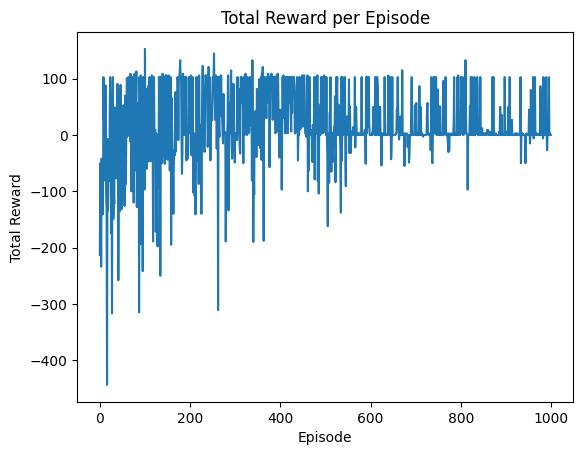

In [36]:
plt.plot(rewards_all_episodes_SARSA)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

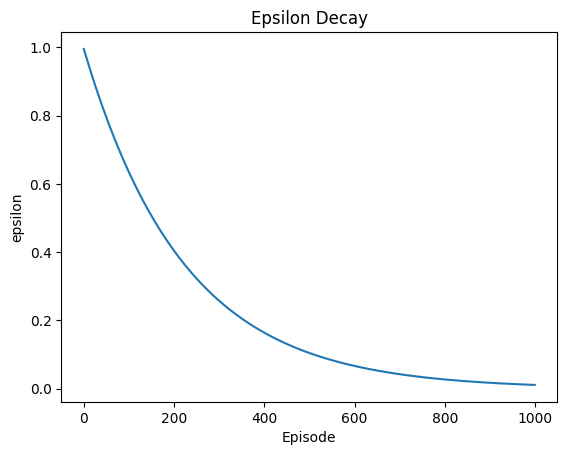

In [37]:
plt.plot(epsilon_values_SARSA)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

In [49]:
with open('Deterministic_sarsa_table.pkl', 'wb') as file:
    pickle.dump(SARSA_D_q_table, file)

In [124]:
def run_greedy_policy_s(environment, q_table, num_episodes, max_steps_per_episode):
    environment_width = environment.environment_width
    total_rewards = []

    for episode in range(num_episodes):
        state_2d = environment.reset()
        state = state_2d[0] * environment_width + state_2d[1]
        episode_rewards = 0

        for step in range(max_steps_per_episode):
            action = np.argmax(q_table[state, :])  #Choosing the max value in the q table
            new_state_2d, reward, done, _ = environment.step(action)
            new_state = new_state_2d[0] * environment_width + new_state_2d[1]
            episode_rewards += reward

            state = new_state
            if done:
                break

        total_rewards.append(episode_rewards)

    return total_rewards


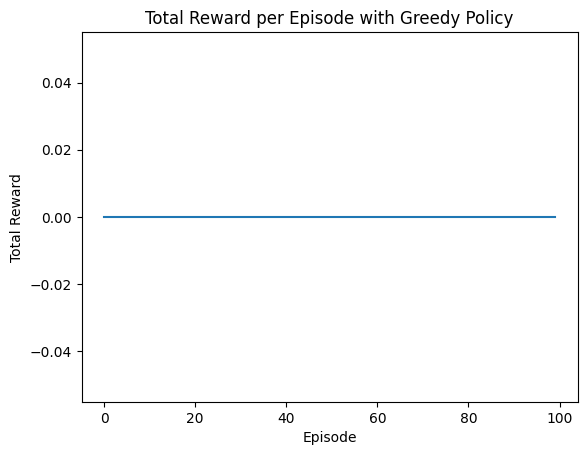

In [131]:
num_episodes = 100
#max_steps_per_episode = 10000

total_rewards = run_greedy_policy(deterministic_env, q_table, num_episodes)

plt.plot(total_rewards)
plt.title('Total Reward per Episode with Greedy Policy')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

#SARSA for Stochastic environment

In [39]:
stochastic_environment = GodOfWar()  #Initiate the environment
make_environment_stochastic(environment)  #Apply stochasticity to the environment

num_episodes = 1000
max_steps_per_episode = 100
alpha = 0.1  #Learning rate
gamma = 0.93  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

s_q_table_SARSA, s_rewards_all_episodes_SARSA, s_epsilon_values_SARSA = SARSA_L(
    stochastic_environment, alpha, epsilon, epsilon_decay, gamma, num_episodes)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: 116, Epsilon: 0.995
Episode: 1, Reward: -143, Epsilon: 0.990025
Episode: 2, Reward: 70, Epsilon: 0.985074875
Episode: 3, Reward: -78, Epsilon: 0.9801495006250001
Episode: 4, Reward: 103, Epsilon: 0.9752487531218751
Episode: 5, Reward: 49, Epsilon: 0.9703725093562657
Episode: 6, Reward: 80, Epsilon: 0.9655206468094844
Episode: 7, Reward: -77, Epsilon: 0.960693043575437
Episode: 8, Reward: -105, Epsilon: 0.9558895783575597
Episode: 9, Reward: -137, Epsilon: 0.9511101304657719
Episode: 10, Reward: -102, Epsilon: 0.946354579813443
Episode: 11, Reward: 12, Epsilon: 0.9416228069143757
Episode: 12, Reward: 3, Epsilon: 0.9369146928798039
Episode: 13, Reward: -212, Epsilon: 0.9322301194154049
Episode: 14, Reward: -166, Ep

In [40]:
print("Q-table:")
print(s_q_table_SARSA)

Q-table:
[[  2.51487015   4.19725723  -4.304549    12.00076521]
 [ -0.52213526  13.91806855   3.67813712  18.50846627]
 [ 12.34562614  -8.03023493 -15.48612007 -18.38999205]
 [ 16.4824269   32.22849433  26.91497419  18.10227363]
 [  0.99431001   8.46816807  26.74339403   3.47137302]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  2.22878761   6.46151014  18.77360809  10.52663091]]


In [46]:
with open('stochastic_SARSA_table.pkl', 'wb') as file:
    pickle.dump(s_q_table_SARSA, file)

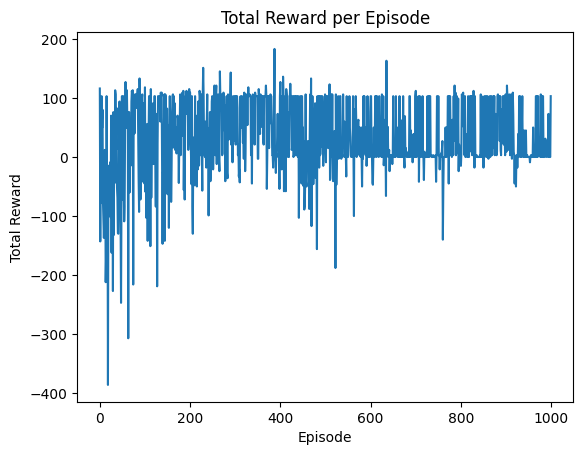

In [41]:
plt.plot(s_rewards_all_episodes_SARSA)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

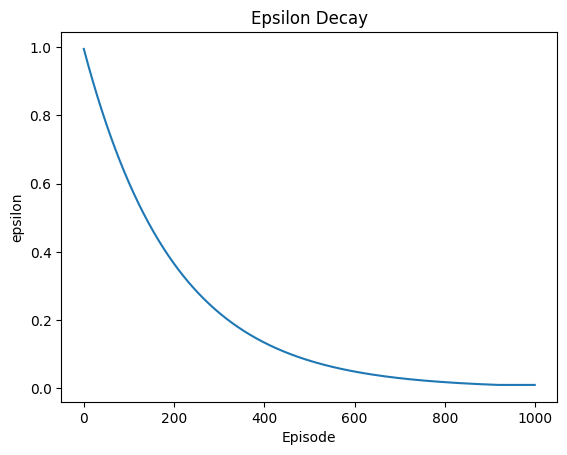

In [42]:
plt.plot(s_epsilon_values_SARSA)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

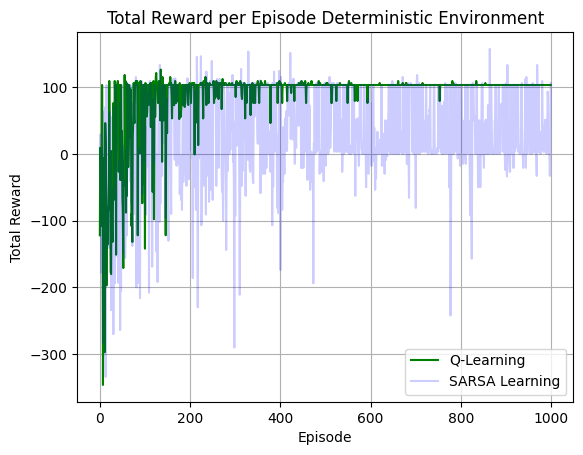

In [142]:
plt.plot(rewards_all_episodes_Q_d, color='green', alpha = 1.0, label='Q-Learning')
plt.plot(rewards_all_episodes_SARSA, color='blue', alpha = 0.2, label='SARSA Learning')
plt.title('Total Reward per Episode Deterministic Environment')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.legend()
plt.show()

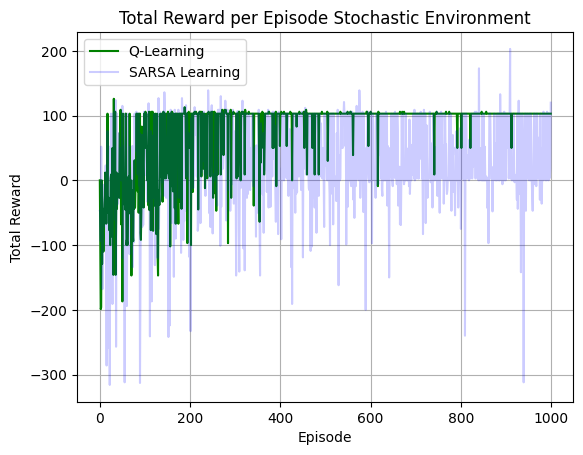

In [144]:
plt.plot(s_rewards_all_episodes_Q, color='green', alpha = 1.0, label='Q-Learning')
plt.plot(s_rewards_all_episodes_SARSA, color='blue', alpha = 0.2, label='SARSA Learning')
plt.title('Total Reward per Episode Stochastic Environment')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.legend()
plt.show()